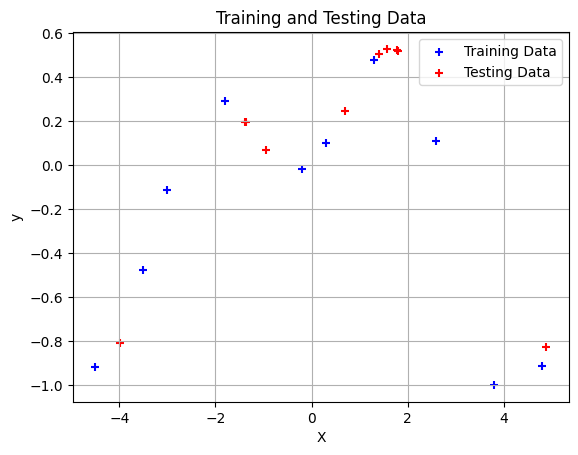

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#step 1.1

X = np.array([-4.5, -3.5, -3, -1.8, -0.2, 0.3, 1.3, 2.6, 3.8, 4.8]).reshape(-1,1)
y = np.array([
    [-0.91650116],
    [-0.47546053],
    [-0.10972425],
    [ 0.29504095],
    [-0.01596218],
    [ 0.10014949],
    [ 0.48104303],
    [ 0.10979023],
    [-0.99742128],
    [-0.91221826]
]).reshape(-1,1)

X_test = np.array([-3.99, -1.38, -1.37, -0.94,
                   0.69, 1.4, 1.57, 1.78, 1.81, 4.89]).reshape(-1,1)
y_test = np.array([
    [-0.80737607],
    [ 0.19813376],
    [ 0.19537639],
    [ 0.07185977],
    [ 0.24954213],
    [ 0.50662504],
    [ 0.52943298],
    [ 0.52406997],
    [ 0.51999057],
    [-0.82318288]
]).reshape(-1,1)

# Plotting Training Data (X, y)
plt.figure()
plt.scatter(X, y, color='blue', marker='+', label='Training Data')

# Plotting Testing Data (X_test, y_test)
plt.scatter(X_test, y_test, color='red', marker='+', label='Testing Data')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Testing Data')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
#step 1.2
def poly_features(X, K):
    # return np.hstack([X**i for i in range(K + 1)])
    X= X.flatten()
    N= X.shape[0]
    Phi= np.zeros((N,K+1))
    for k in range (K+1):
        Phi[:,k]= X**k
    return Phi



Theta_ml:
 [[ 0.24879002]
 [ 0.16821157]
 [-0.04601541]
 [-0.03263259]
 [-0.00076967]
 [ 0.00119427]]


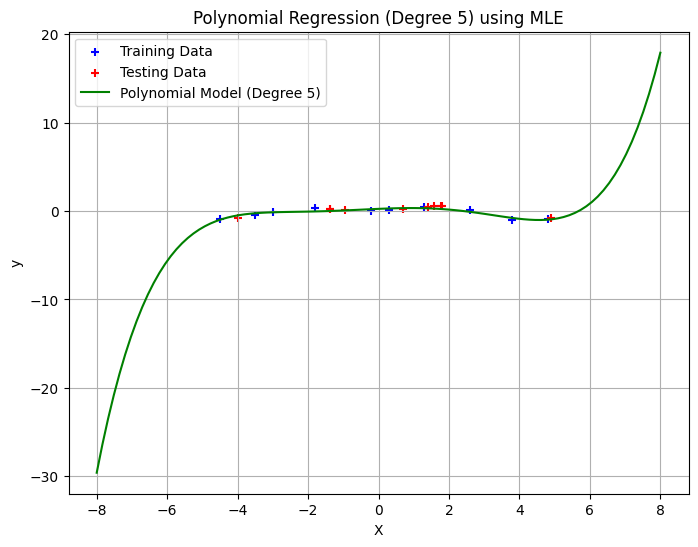

In [25]:
#step 1.3
# Polynomial degree
K = 5

# Transform both training and testing data
Phi_train = poly_features(X, K)
Phi_test = poly_features(X_test, K)

# Compute MLE coefficients: theta_MLE = (Phi^T Phi)^(-1) Phi^T y
theta_ml = np.linalg.inv(Phi_train.T @ Phi_train) @ Phi_train.T @ y
theta_ml_test = np.linalg.inv(Phi_test.T @ Phi_test) @ Phi_test.T @ y_test
print("Theta_ml:\n", theta_ml)


# Generate a range of x values from -8 to 8 for plotting the model's predictions
X_plot = np.linspace(-8, 8, 100).reshape(-1,1)
Phi_plot = poly_features(X_plot, K)
y_plot = Phi_plot @ theta_ml

# Plotting
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue',marker='+' ,label='Training Data')
plt.scatter(X_test, y_test, color='red',marker='+',label='Testing Data')

# Plot the polynomial fit
plt.plot(X_plot, y_plot, color='green', label='Polynomial Model (Degree 5)')

plt.title('Polynomial Regression (Degree 5) using MLE')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()



Train RMSE values: [0.5147699543846374, 0.5117157870391207, 0.22972426509507113, 0.22879771630326973, 0.22879573735413525, 0.19502327062655744, 0.05342435077718177, 0.03818517735253735, 0.003910516742283594, 5.538327228678245e-10, 0.999183995488885, 34.68901085509442, 2.4195160890609984, 0.9029673413927789, 3.0081770554024114, 1.1934142035010373]
Test RMSE values: [0.6099911018527294, 0.6216251909396072, 0.28492811777747346, 0.29486416063656634, 0.29498152071402095, 0.21742862799598514, 0.08213402882291138, 0.07763539925156139, 0.03924484661505437, 0.030724661923518273, 1.2579162752970154, 39.66507331006011, 2.435318758318806, 0.8844692052280537, 2.61375681037945, 4.830158928594374]
Optimal polynomial degree (based on test RMSE): 9


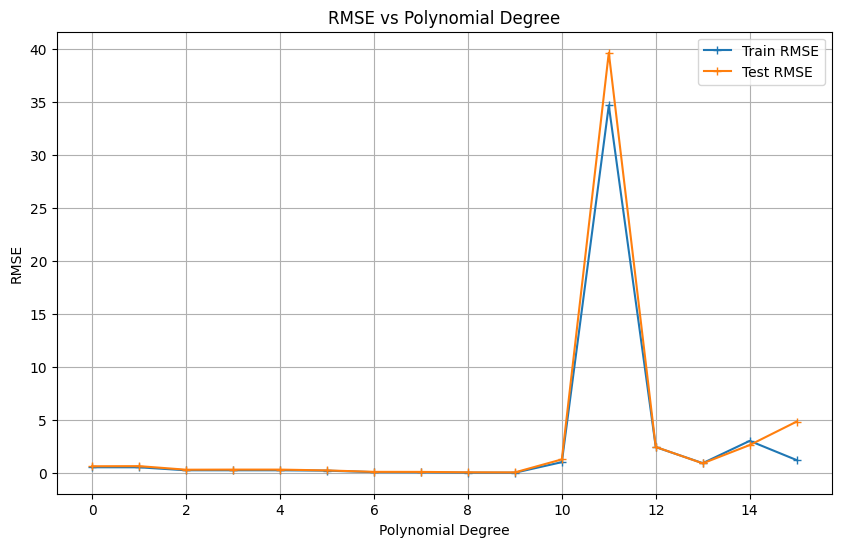

In [31]:
#step 1.4
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

max_degree = 16
train_rmse_values = []
test_rmse_values = []

for d in range(max_degree):
    # Generate polynomial features for both training and testing sets
    Phi_train = poly_features(X, d)
    Phi_test = poly_features(X_test, d)

    # Compute theta_MLE = (Phi^T Phi)^(-1) Phi^T y
    # Handle the case d=0 where Phi is just a column of ones
    theta_ml = np.linalg.inv(Phi_train.T @ Phi_train) @ (Phi_train.T @ y)

    # Predictions
    y_pred_train = Phi_train @ theta_ml
    y_pred_test = Phi_test @ theta_ml

    # Compute RMSE for train and test
    train_rmse = rmse(y, y_pred_train)
    test_rmse = rmse(y_test, y_pred_test)

    train_rmse_values.append(train_rmse)
    test_rmse_values.append(test_rmse)

# Determine optimal polynomial degree based on minimum test RMSE
optimal_degree = np.argmin(test_rmse_values)

print("Train RMSE values:", train_rmse_values)
print("Test RMSE values:", test_rmse_values)
print(f"Optimal polynomial degree (based on test RMSE): {optimal_degree}")

# Plotting the RMSE for training and testing sets
plt.figure(figsize=(10,6))
plt.plot(range(max_degree), train_rmse_values, marker='+', label='Train RMSE')
plt.plot(range(max_degree), test_rmse_values, marker='+', label='Test RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.grid(True)
plt.legend()
plt.show()

Optimal polynomial degree (based on test RMSE): 9


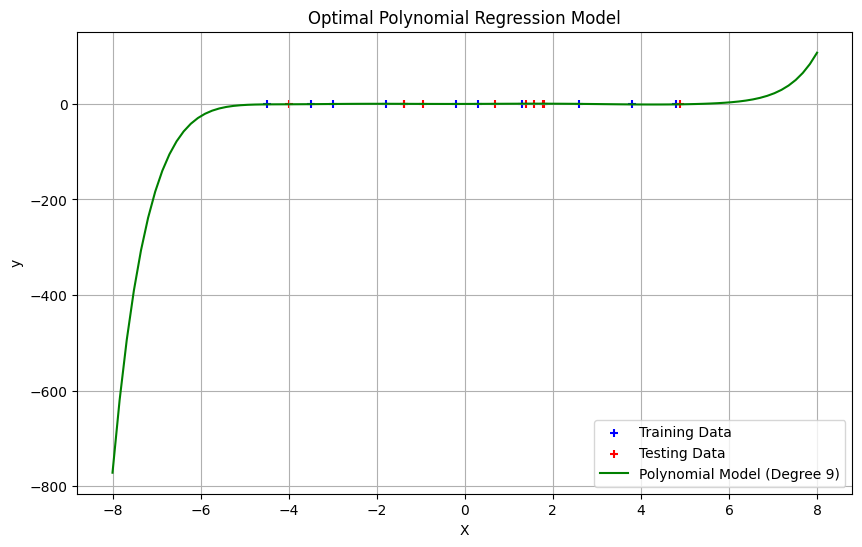

In [34]:
#step 1.5
# Re-fit the model using the optimal degree
Phi_train_opt = poly_features(X, optimal_degree)
theta_MLE_opt = np.linalg.inv(Phi_train_opt.T @ Phi_train_opt) @ (Phi_train_opt.T @ y)

# Generate predictions over the range [-8, 8]
X_plot = np.linspace(-8, 8, 100).reshape(-1,1)
Phi_plot = poly_features(X_plot, optimal_degree)
y_plot = Phi_plot @ theta_MLE_opt
print(f"Optimal polynomial degree (based on test RMSE): {optimal_degree}")
# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue',marker='+', label='Training Data')
plt.scatter(X_test, y_test, color='red',marker='+', label='Testing Data')
plt.plot(X_plot, y_plot, color='green', label=f'Polynomial Model (Degree {optimal_degree})')

plt.title('Optimal Polynomial Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()